# TP 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice
import datetime as datetime
import glob

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

#import warnings
#warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
eci = pd.read_csv('Entrenamieto_ECI_2020.csv')

# Preprocesamiento y limpieza de datos

Completo los datos faltantes de 'Total_Taxable_Amount' con los de 'Total_Amount'

In [15]:
len(eci['Total_Taxable_Amount'].loc[eci.Total_Taxable_Amount==0.00])

997

In [4]:
eci['Total_Taxable_Amount'].loc[eci.Total_Taxable_Amount==0.00] = eci.loc[eci.Total_Taxable_Amount==0.00]\
                                            .groupby(['Opportunity_Name'])['Total_Amount'].transform('sum')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Vemos que van a quedar pocos valores que tienen 'Total_Taxable_Amount' y 'Total_Amount' en cero. Llegado el caso de estudio, se pueden ignorar

In [5]:
len(eci['Total_Taxable_Amount'].loc[eci.Total_Taxable_Amount==0.00])

97

In [12]:
eci.loc[eci.Total_Taxable_Amount==0.00]['Total_Amount'].value_counts()

0.00    38
Name: Total_Amount, dtype: int64

In [13]:
eci.loc[eci.Total_Taxable_Amount==0.00]['Total_Amount'].isnull().sum()

59

Convierto Total_Amount y Total_Taxable_Amount a una sola moneda

In [6]:
#Para convertir todos los precios de Total_Amount de diferentes monedas a dolar, no voy a usar los precios del
#mercado actual. Voy a utilizar la conversión que se usó en el dataset original en la columna ASP_(converted)

In [7]:
toEUR = eci[eci.ASP_Currency=='EUR'].head(1)[['ASP_(converted)']].iloc[0,0]/eci[eci.ASP_Currency=='EUR'].head(1)[['ASP']].iloc[0,0]
toAUD = eci[eci.ASP_Currency=='AUD'].head(1)[['ASP_(converted)']].iloc[0,0]/eci[eci.ASP_Currency=='AUD'].head(1)[['ASP']].iloc[0,0]
toGBP = eci[eci.ASP_Currency=='GBP'].head(1)[['ASP_(converted)']].iloc[0,0]/eci[eci.ASP_Currency=='GBP'].head(1)[['ASP']].iloc[0,0]
toJPY = eci[['ASP_(converted)']].iloc[12,0]/eci[['ASP']].iloc[12,0]
#En el head(1) de JPY justo habia un nan. Ese numero magico 12 corresponde a la primera fila de moneda JPY con un valor valido

In [8]:
#Lo siguiente es para comprobar que funciona bien

In [9]:
eci['ASP_(convertido)']=0.0
eci['ASP_(convertido)'].loc[eci.ASP_Currency=='EUR'] = eci['ASP'].apply(lambda x: x*toEUR)
eci['ASP_(convertido)'].loc[eci.ASP_Currency=='JPY'] = eci['ASP'].apply(lambda x: x*toJPY)
eci['ASP_(convertido)'].loc[eci.ASP_Currency=='AUD'] = eci['ASP'].apply(lambda x: x*toAUD)
eci['ASP_(convertido)'].loc[eci.ASP_Currency=='GBP'] = eci['ASP'].apply(lambda x: x*toGBP)
eci['ASP_(convertido)'].loc[eci.ASP_Currency=='USD'] = eci['ASP'].apply(lambda x: x)

In [10]:
eciAux = eci.dropna(subset=['ASP_(converted)'])

In [11]:
print("Coinciden todos en el subset: ", all(abs(eciAux['ASP_(converted)']-eciAux['ASP_(convertido)']) < 0.01))

Coinciden todos en el subset:  True


In [12]:
del eciAux
eci.drop(columns='ASP_(convertido)',inplace=True)

In [13]:
#Ahora si hago la conversion
eci['Total_Amount_(converted)']=0.0
eci['Total_Amount_(converted)'].loc[eci['Total_Amount_Currency']=='EUR'] = eci['Total_Amount'].apply(lambda x: x*toEUR)
eci['Total_Amount_(converted)'].loc[eci['Total_Amount_Currency']=='JPY'] = eci['Total_Amount'].apply(lambda x: x*toJPY)
eci['Total_Amount_(converted)'].loc[eci['Total_Amount_Currency']=='AUD'] = eci['Total_Amount'].apply(lambda x: x*toAUD)
eci['Total_Amount_(converted)'].loc[eci['Total_Amount_Currency']=='GBP'] = eci['Total_Amount'].apply(lambda x: x*toGBP)
eci['Total_Amount_(converted)'].loc[eci['Total_Amount_Currency']=='USD'] = eci['Total_Amount'].apply(lambda x: x)

eci['Total_Taxable_Amount_(converted)']=0.0
eci['Total_Taxable_Amount_(converted)'].loc[eci['Total_Taxable_Amount_Currency']=='EUR'] = eci['Total_Taxable_Amount'].apply(lambda x: x*toEUR)
eci['Total_Taxable_Amount_(converted)'].loc[eci['Total_Taxable_Amount_Currency']=='JPY'] = eci['Total_Taxable_Amount'].apply(lambda x: x*toJPY)
eci['Total_Taxable_Amount_(converted)'].loc[eci['Total_Taxable_Amount_Currency']=='AUD'] = eci['Total_Taxable_Amount'].apply(lambda x: x*toAUD)
eci['Total_Taxable_Amount_(converted)'].loc[eci['Total_Taxable_Amount_Currency']=='GBP'] = eci['Total_Taxable_Amount'].apply(lambda x: x*toGBP)
eci['Total_Taxable_Amount_(converted)'].loc[eci['Total_Taxable_Amount_Currency']=='USD'] = eci['Total_Taxable_Amount'].apply(lambda x: x)

In [14]:
#Columna inservible
eci['Actual_Delivery_Date'].value_counts()

NaT    16947
Name: Actual_Delivery_Date, dtype: int64

In [135]:
#Columna inservible
eci['Last_Activity'].value_counts()

NaT    16947
Name: Last_Activity, dtype: int64

In [23]:
#Columna inservible (creo)
eci['Submitted_for_Approval'].value_counts()

0    16947
Name: Submitted_for_Approval, dtype: int64

In [57]:
#Columna inservible (creo)
eci['Prod_Category_A'].value_counts()

Prod_Category_A_None    16947
Name: Prod_Category_A, dtype: int64

In [156]:
#Todo es en dolares
eci['ASP_(converted)_Currency'].value_counts()

USD    16947
Name: ASP_(converted)_Currency, dtype: int64

In [136]:
#Supongo que todas estas columnas se pueden eliminar

COLUMNAS CON MUCHISIMOS VALORES NULOS (VER QUE HACER): Brand, Product_Type, Size, Product_Category_B, Price, Currency

# Preguntas

In [15]:
eciOp = eci.drop_duplicates('Opportunity_ID')

In [16]:
stage = eciOp['Stage'].value_counts().to_frame().reset_index()\
                      .rename(columns={'index':'Stage','Stage':'cantidad'})
stage

,Stage,cantidad
0,Closed Won,5072
1,Closed Lost,4719
2,Proposal,30
3,Negotiation,11
4,Qualification,9


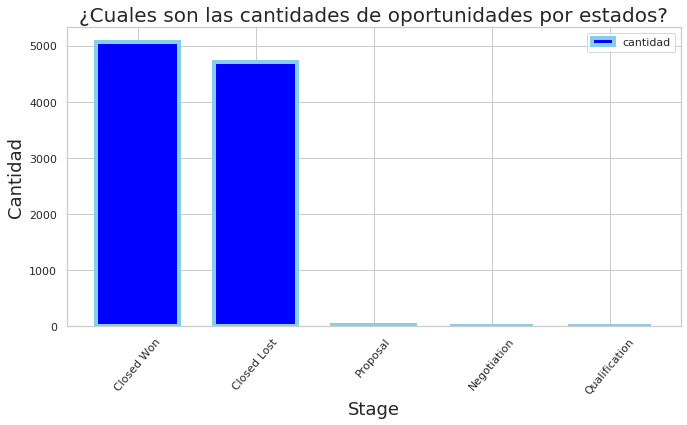

In [5]:
stage.plot(kind='bar', x='Stage', y='cantidad',\
                 width=0.7, figsize=(11,5.5), color='blue',\
                 edgecolor="skyblue", linewidth=4, rot=50)
g=plt.gca()
g.set_title("¿Cuales son las cantidades de oportunidades por estados?",\
            fontsize=20);
g.set_xlabel("Stage", fontsize=18);
g.set_ylabel("Cantidad", fontsize=18);

In [6]:
region = eciOp['Region'].value_counts().to_frame().reset_index()\
                        .rename(columns={'index':'Region','Region':'cantidad'})
region

,Region,cantidad
0,EMEA,3241
1,Americas,2459
2,APAC,2086
3,Japan,1906
4,Middle East,149


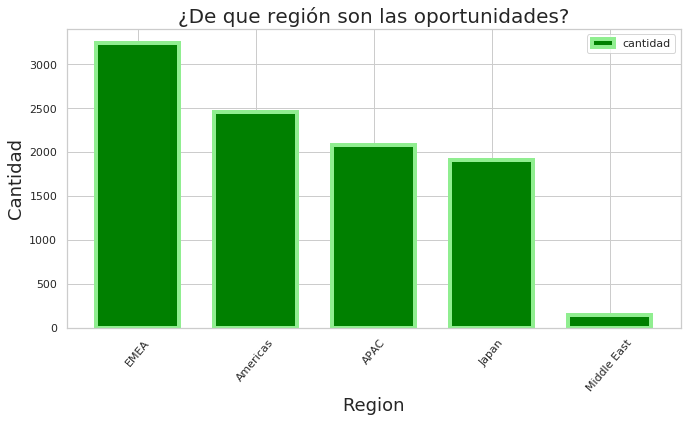

In [7]:
region.plot(kind='bar', x='Region', y='cantidad',\
                 width=0.7, figsize=(11,5.5), color='green',\
                 edgecolor="lightgreen", linewidth=4, rot=50)
g=plt.gca()
g.set_title("¿De que región son las oportunidades?",\
            fontsize=20);
g.set_xlabel("Region", fontsize=18);
g.set_ylabel("Cantidad", fontsize=18);

In [8]:
territory = eciOp['Territory'].value_counts().to_frame().reset_index()\
                              .rename(columns={'index':'Territorio','Territory':'cantidad'})
territory = territory[territory['Territorio']!='None'].head(10)
territory

,Territorio,cantidad
1,Germany,1080
2,NW America,878
3,India,680
4,Japan,607
5,Australia,579
6,NE America,518
7,France,393
8,Netherlands,384
9,SE America,340
10,Singapore,293


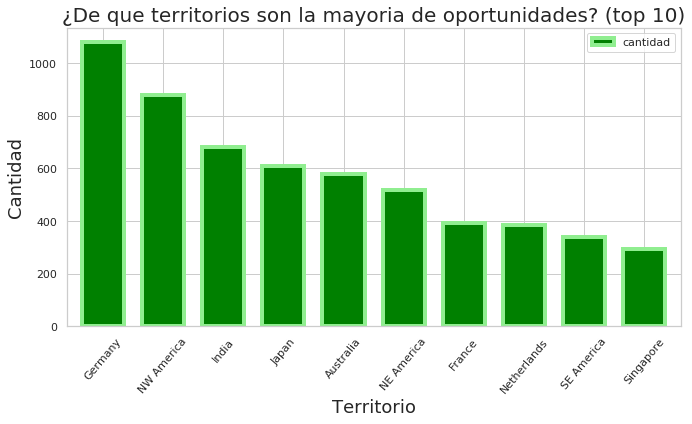

In [9]:
territory.plot(kind='bar', x='Territorio', y='cantidad',\
                 width=0.7, figsize=(11,5.5), color='green',\
                 edgecolor="lightgreen", linewidth=4, rot=50)
g=plt.gca()
g.set_title("¿De que territorios son la mayoria de oportunidades? (top 10)",\
            fontsize=20);
g.set_xlabel("Territorio", fontsize=18);
g.set_ylabel("Cantidad", fontsize=18);

In [35]:
billingCountry = eciOp['Billing_Country'].value_counts().to_frame().reset_index()\
                                         .rename(columns={'index':'Pais','Billing_Country':'cantidad'})
billingCountry 

,Pais,cantidad
0,United States,2350
1,Japan,1899
2,Germany,1308
3,India,560
4,Australia,559
...,...,...
75,Armenia,1
76,Liechtenstein,1
77,Slovakia,1
78,Oman,1


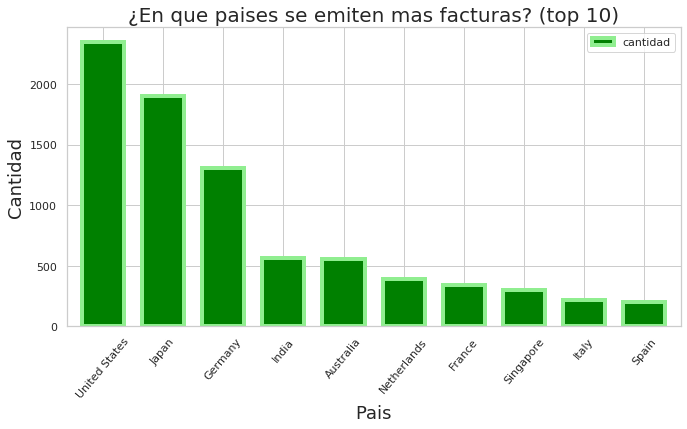

In [36]:
billingCountry.head(10).plot(kind='bar', x='Pais', y='cantidad',\
                 width=0.7, figsize=(11,5.5), color='green',\
                 edgecolor="lightgreen", linewidth=4, rot=50)
g=plt.gca()
g.set_title("¿En que paises se emiten mas facturas? (top 10)",\
            fontsize=20);
g.set_xlabel("Pais", fontsize=18);
g.set_ylabel("Cantidad", fontsize=18);

In [7]:
eciOp['Account_Created_Date'] = pd.to_datetime(eciOp['Account_Created_Date'])
eciOp['Account_Created_Year'] = eciOp['Account_Created_Date'].dt.year
accountCreatedYear = eciOp.groupby('Account_Created_Year').agg({'ID':'count'}).reset_index().rename(columns={'ID':'cantidad','Account_Created_Year':'Año'})
accountCreatedYear

/home/german/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/german/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Año,cantidad
0,2013,2835
1,2014,885
2,2015,1898
3,2016,2137
4,2017,1526
5,2018,560


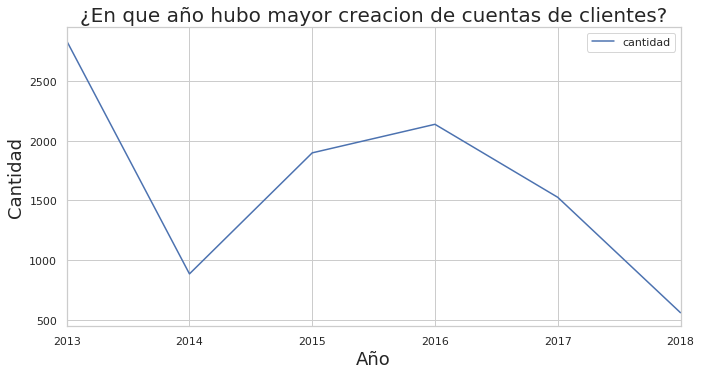

In [8]:
accountCreatedYear.plot(kind='line', x='Año', y='cantidad',figsize=(11,5.5))
g=plt.gca()
g.set_title("¿En que año hubo mayor creacion de cuentas de clientes?",\
            fontsize=20);
g.set_xlabel("Año", fontsize=18);
g.set_ylabel("Cantidad", fontsize=18);

In [9]:
eci['Opportunity_Created_Date'] = pd.to_datetime(eci['Opportunity_Created_Date'])
eci['Opportunity_Created_Year'] = eci['Opportunity_Created_Date'].dt.year
opportunityCreatedYear = eci.groupby('Opportunity_Created_Year').agg({'ID':'count'}).reset_index().rename(columns={'ID':'cantidad','Opportunity_Created_Year':'Año'})
opportunityCreatedYear

,Año,cantidad
0,2013,1
1,2014,40
2,2015,1012
3,2016,4355
4,2017,6921
5,2018,4618


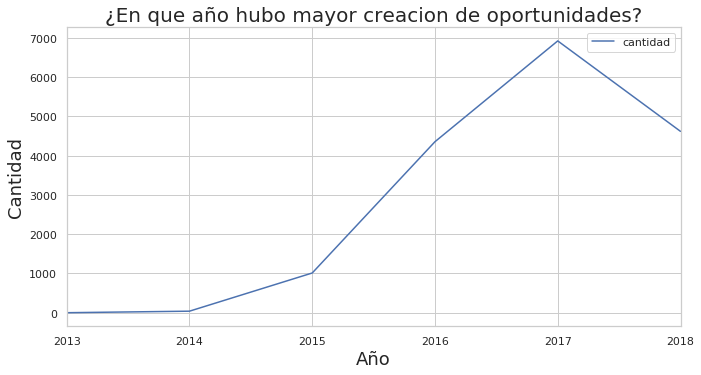

In [10]:
opportunityCreatedYear.plot(kind='line', x='Año', y='cantidad',figsize=(11,5.5))
g=plt.gca()
g.set_title("¿En que año hubo mayor creacion de oportunidades?",\
            fontsize=20);
g.set_xlabel("Año", fontsize=18);
g.set_ylabel("Cantidad", fontsize=18);

# Dudas para el grupo

¿Que es Quote_Type? 

Creo que es cuando cierran el trato legalmente. Cuando dice "Binding" me suena a que hay algún contrato o algo para cumplir, el precio imagino, non binding, me suena a que es más de palabra pero si alguno se arrepiente antes no hay que pagar etc. Después hay otra columna que tiene la fecha de expiración de este contrato, si se pasa imagino que ya pasa a ser non binding o que lo acordado ya no vale más.

In [116]:
eci['Quote_Type'].value_counts()

Non Binding    16777
Binding          170
Name: Quote_Type, dtype: int64